In [33]:
import pandas as pd
import nltk
from nltk.corpus import stopwords 
import re
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Cleaning
       We will be performing the following cleaning Steps <br>
       1.drop NA <br>
       2.Remove Puntuations <br>
       3.Remove Stopwords <br>
       4.we will also do Stemming and Lemmitization based on the performance<br>
       5.As observed in this data set we have reviews that go like 'Review of canva' we will be dropping those as well

In [6]:
df = pd.read_excel('Geenrative AI products.xlsx')
df2 = pd.read_excel('producthunt-list-review.xlsx')

In [7]:
print(f"Length of df1 {len(df)} ---- Length of df2 {len(df2)}")

Length of df1 351 ---- Length of df2 3875


In [8]:
df.head()

,Product,Reviewer,Comments
0,ChatGPT,Lindsay Jones,Chat GPT is an incredibly useful tool that hel...
1,ChatGPT,Dina Shaw,It's like having your personal assistant that ...
2,ChatGPT,Keita Mitsuhashi,I tried tons of other AI products made for spe...
3,ChatGPT,Miguel Anticona,An excellent conversational AI to improve and ...
4,ChatGPT,Zafer Arıcan,"In response to ""Which AI tools have you tried ..."


In [9]:
df2.head()

,Product,Reviewer,Comments
0,GPTBots.AI,kai fu,I created a data analysis bot and it only took...
1,GPTBots.AI,方露,Simple work can be entrusted to GPTBots with c...
2,GPTBots.AI,Marshell He,amazing.... I really loved this. It is wonderf...
3,GPTBots.AI,hengliang,"Very helpful, recommended, and better than usi..."
4,GPTBots.AI,Liuying,Great product. AI is changing the world.


In [10]:
print(f"Number of unique Reviewers --- {len(df2['Reviewer'].unique())}")

Number of unique Reviewers --- 3735


In [11]:
print(f"Number of Products  ---- {len(df2['Product'].unique())}")

unique_products = [product for product in df2['Product'].unique()]
nl = '\n'
print(f"Unique Products: {nl}{nl.join(unique_products)}")

Number of Products  ---- 11
Unique Products: 
GPTBots.AI
Zeda.io
Zipy
Pitch N Hire Applicant Tracking Software
Movie Deep Search by AI Keytalk
ioni
ChainGPT
Venturefy.ai
Emma AI
TranscribeMe
Canva


In [12]:
mainDF = pd.DataFrame(df2['Comments'])

In [13]:
mainDF

,Comments
0,I created a data analysis bot and it only took...
1,Simple work can be entrusted to GPTBots with c...
2,amazing.... I really loved this. It is wonderf...
3,"Very helpful, recommended, and better than usi..."
4,Great product. AI is changing the world.
...,...
3870,Review of Canva
3871,Review of Video Messages from Canva
3872,Review of Content Planner by Canva
3873,Review of Canva


#### Removing comments that starts with 'Review'
    as this hold less significance in this analysis , goal of this analyis is exploring customer reviews - as the comments that start with word review are not actually reviews that hold almost value in this analysis as they are not actual customer reviwes in the first place

In [14]:
for index,row in mainDF.iterrows():
    row = str(row['Comments']).split(' ')
    if row[0] == 'Review':
        mainDF.drop([index],inplace=True)

#### Dropping Stopwords and puntuations

In [15]:
stopWords = set(stopwords.words('english'))

In [19]:
for index,row in mainDF.iterrows():
    row = str(row['Comments']).split(' ')
    for p in row:
        if p in stopWords:
            row.remove(p)
    sentence = ' '.join(row)
    sentence = re.sub(r'[^\w\s\n]', '', sentence)
    sentence = re.sub(r"\n\n\S+", "", sentence)
    mainDF['Comments'][index] = re.sub(r"http\S+", "", sentence)

mainDF

,Comments
0,I created data analysis bot took half day set ...
1,Simple work entrusted GPTBots confidence great...
2,amazing I really loved It wonderful tool using...
3,Very helpful recommended better using ChatGPT ...
4,Great product AI changing world
...,...
3629,nan
3630,Its like PowerPoint After Effects baby empower...
3631,Been enjoying using animation features canva c...
3632,I love canva For perfect product creating imag...


In [20]:

# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(mainDF['Comments'])

In [21]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

/home/irshad/miniconda3/envs/TA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [36]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [37]:
clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [38]:

# assign clusters and pca vectors to our dataframe 
mainDF['cluster'] = clusters
mainDF['x0'] = x0
mainDF['x1'] = x1

In [39]:

def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
wow,this,projects,so,product,app,job,very,project,nice

Cluster 1
movie,like,really,experience,one,this,its,very,project,good

Cluster 2
this,love,best,product,awesome,easy,use,amazing,project,great


In [40]:

# map clusters to appropriate labels 
cluster_map = {0: "apprication for nice products", 1: "Comparitiely similar", 2: "about usability "}
# apply mapping
mainDF['cluster'] = mainDF['cluster'].map(cluster_map)

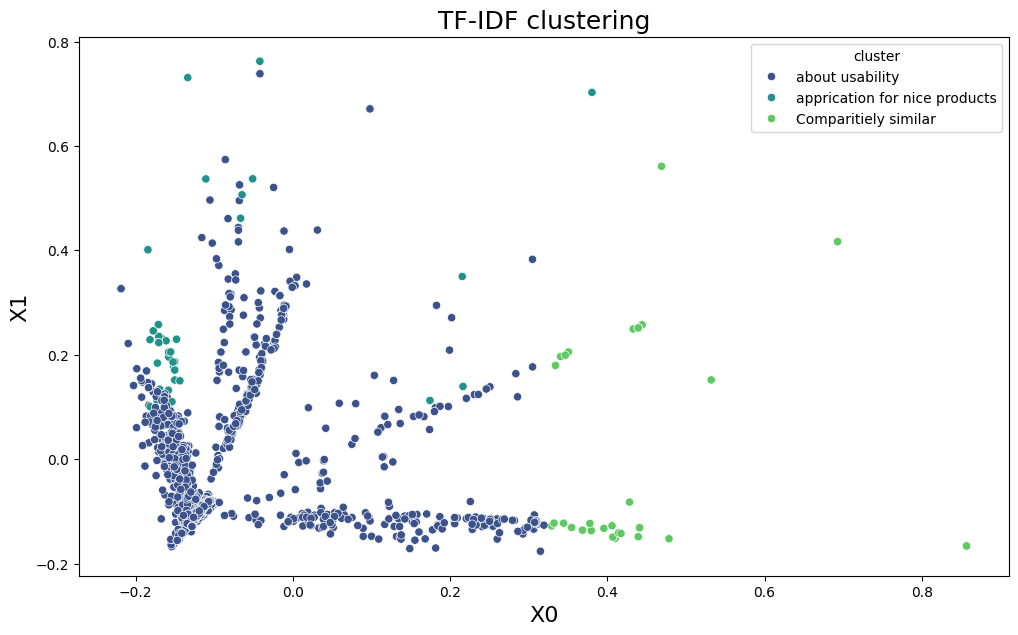

In [42]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=mainDF, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()